In [1]:
# This is a tutorial for time series forcasting using Facebook Prophet

In [44]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline #only needed for jupyter
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')


UsageError: unrecognized arguments: #only needed for jupyter


In [8]:
# Read sales data:
sales_df = pd.read_csv('../data/example_retail_sales.csv')

In [27]:
sales_df.dtypes

ds         object
y         float64
y_orig      int64
dtype: object

In [9]:
sales_df.head()

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079
2,1992-03-01,159336
3,1992-04-01,163669
4,1992-05-01,170068


This is the format that Prophet expects to see. There needs to be a ‘ds’ column  that contains the datetime field and and a ‘y’ column that contains the value we are wanting to model/forecast.

In [10]:
# log-tranform the data to make it more stationary and convert trends to a linear one (bot really necessary)s)
sales_df['y_orig'] = sales_df['y'] # to save a copy of the original data..you'll see why shortly. 
# log-transform y
sales_df['y'] = np.log(sales_df['y'])


In [11]:
sales_df.head()

,ds,y,y_orig
0,1992-01-01,11.893934,146376
1,1992-02-01,11.898725,147079
2,1992-03-01,11.978770,159336
3,1992-04-01,12.005601,163669
4,1992-05-01,12.043954,170068


In [15]:
# fit the . model 
model = Prophet() #instantiate Prophet
model.fit(sales_df); #fit the model with your dataframe

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
# building some future time data
future_data = model.make_future_dataframe(periods=6, freq = 'm')

In [17]:
future_data

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
294,2016-06-30
295,2016-07-31
296,2016-08-31
297,2016-09-30


In [19]:
# predict
forecast_data = model.predict(future_data)

In [21]:
forecast_data.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,11.989275,11.855764,11.894726,11.989275,11.989275,-0.114717,-0.114717,-0.114717,-0.114717,-0.114717,-0.114717,0.0,0.0,0.0,11.874558
1,1992-02-01,11.995689,11.869373,11.910172,11.995689,11.995689,-0.104926,-0.104926,-0.104926,-0.104926,-0.104926,-0.104926,0.0,0.0,0.0,11.890763
2,1992-03-01,12.001690,11.991255,12.031676,12.001690,12.001690,0.009163,0.009163,0.009163,0.009163,0.009163,0.009163,0.0,0.0,0.0,12.010853
3,1992-04-01,12.008104,11.979915,12.021370,12.008104,12.008104,-0.009004,-0.009004,-0.009004,-0.009004,-0.009004,-0.009004,0.0,0.0,0.0,11.999100
4,1992-05-01,12.014312,12.033985,12.074088,12.014312,12.014312,0.040442,0.040442,0.040442,0.040442,0.040442,0.040442,0.0,0.0,0.0,12.054754


In [26]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()    

,ds,yhat,yhat_lower,yhat_upper
0,1992-01-01,11.874558,11.855764,11.894726
1,1992-02-01,11.890763,11.869373,11.910172
2,1992-03-01,12.010853,11.991255,12.031676
3,1992-04-01,11.999100,11.979915,12.021370
4,1992-05-01,12.054754,12.033985,12.074088


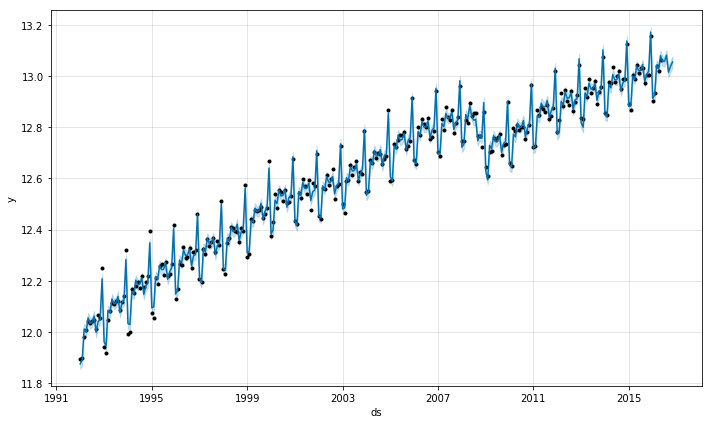

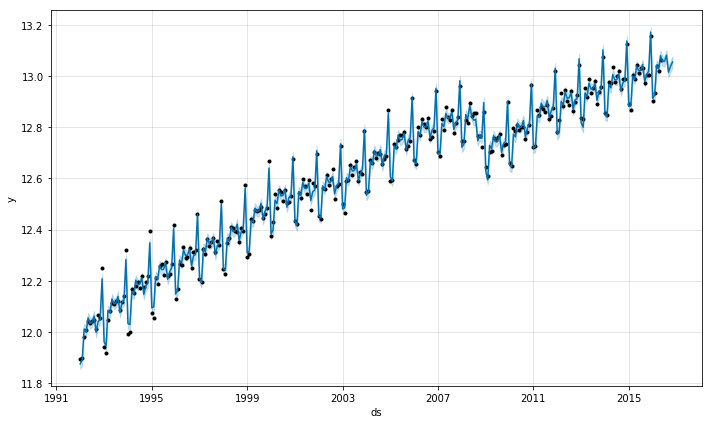

In [31]:
model.plot(forecast_data)

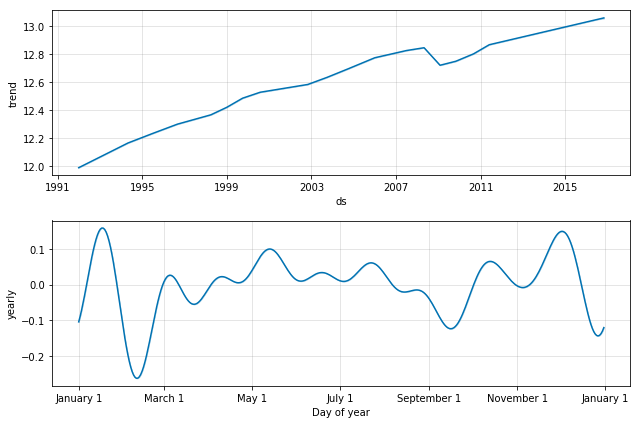

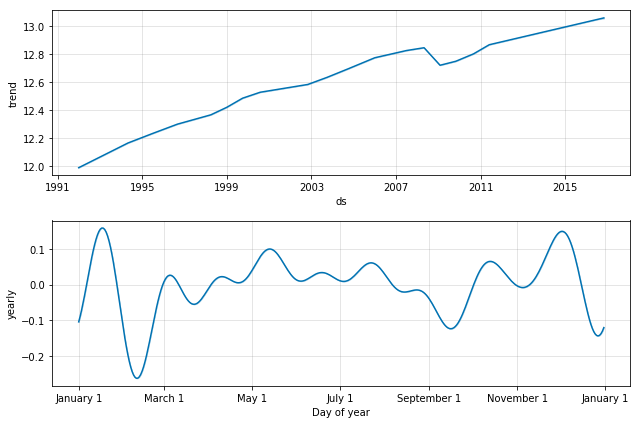

In [33]:
#let’s take a look at the seasonality and trend components of our /data/model/forecast.
model.plot_components(forecast_data)

In [34]:
# getting baxk to original data:

forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

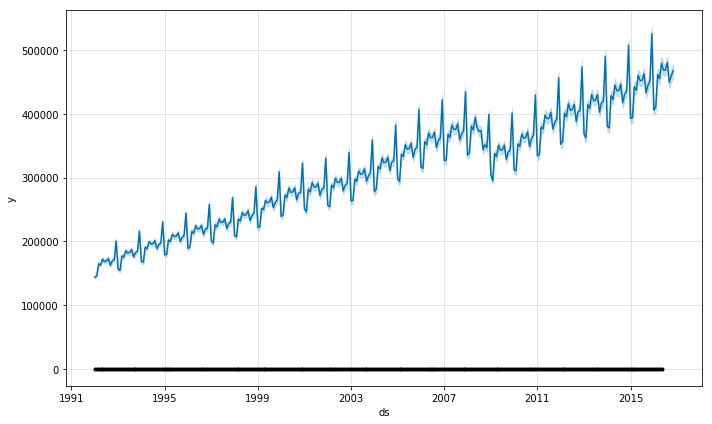

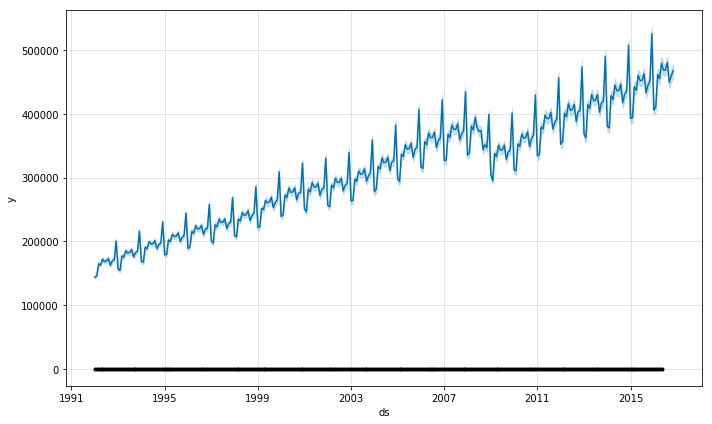

In [35]:
model.plot(forecast_data_orig)

In [40]:
# getting back to original data 
sales_df['y_log']=sales_df['y'] #copy the log-transformed data to another column
sales_df['y']=sales_df['y_orig'] #copy the original data to 'y'

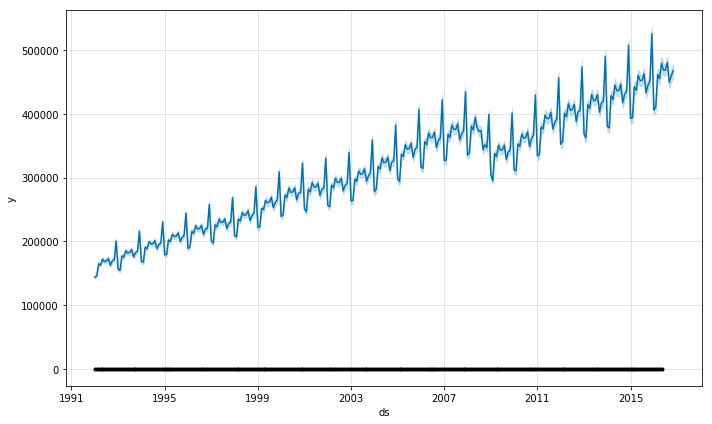

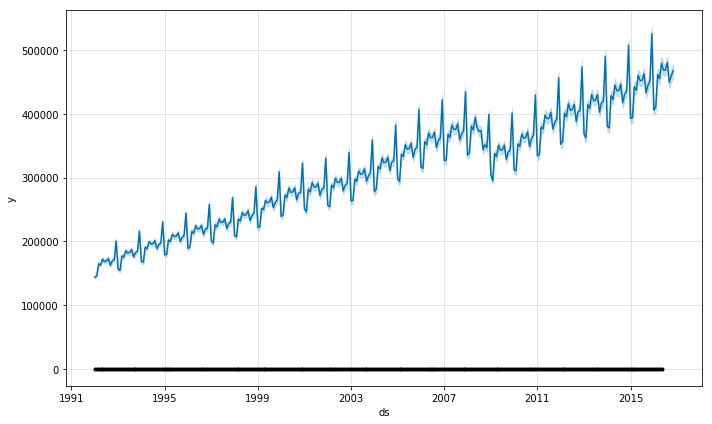

In [37]:
model.plot(forecast_data_orig)

In [56]:
# part 2:

sales_df = pd.read_csv('../data/example_retail_sales.csv')

sales_df['y_orig']=sales_df.y # We want to save the original data for later use
sales_df['y'] = np.log(sales_df['y']) #take the log of the data to remove trends, etc

model = Prophet()
model.fit(sales_df);

#create 12 months of future data
future_data = model.make_future_dataframe(periods=12, freq = 'm')

#forecast the data for future data
forecast_data = model.predict(future_data)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


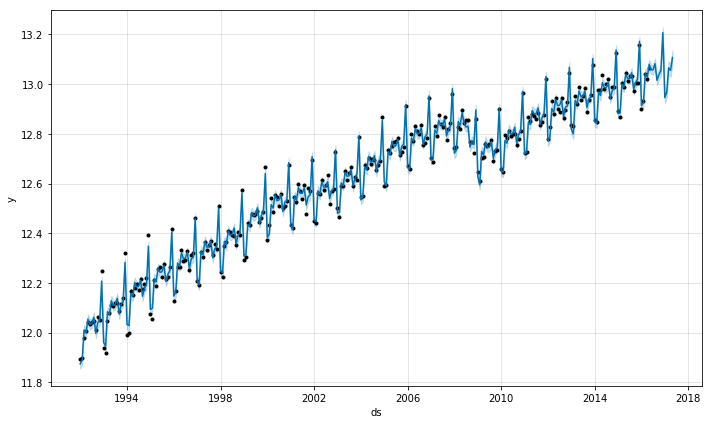

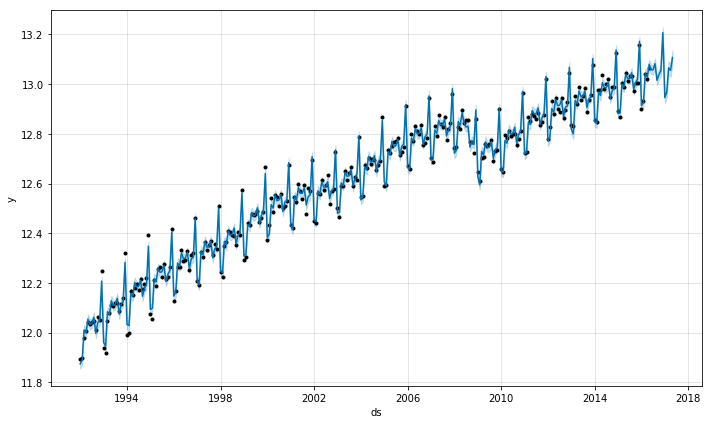

In [57]:

model.plot(forecast_data)

In [58]:
sales_df.columns

Index(['ds', 'y', 'y_orig'], dtype='object')

In [59]:
sales_df.set_index('ds', inplace=True)
forecast_data.set_index('ds', inplace=True)
viz_df = sales_df.join(forecast_data[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')


In [60]:
sales_df.index = pd.to_datetime(sales_df.index)
last_date = sales_df.index[-1]

In [61]:
from datetime import date,timedelta
 
def plot_data(func_df, end_date):
    end_date = end_date - timedelta(weeks=4) # find the 2nd to last row in the data. We don't take the last row because we want the charted lines to connect
    mask = (func_df.index > end_date) # set up a mask to pull out the predicted rows of data.
    predict_df = func_df.loc[mask] # using the mask, we create a new dataframe with just the predicted data.
  
# Now...plot everything
    fig, ax1 = plt.subplots()
    ax1.plot(sales_df.y_orig)
    ax1.plot((np.exp(predict_df.yhat)), color='black', linestyle=':')
    ax1.fill_between(predict_df.index, np.exp(predict_df['yhat_upper']), np.exp(predict_df['yhat_lower']), alpha=0.5, color='darkgray')
    ax1.set_title('Sales (Orange) vs Sales Forecast (Black)')
    ax1.set_ylabel('Dollar Sales')
    ax1.set_xlabel('Date')
  
# change the legend text
    L=ax1.legend() #get the legend
    L.get_texts()[0].set_text('Actual Sales') #change the legend text for 1st plot
    L.get_texts()[1].set_text('Forecasted Sales') #change the legend text for 2nd plot

In [62]:
# adding holidays

promotions = pd.DataFrame({
  'holiday': 'december_promotion',
  'ds': pd.to_datetime(['2009-12-01', '2010-12-01', '2011-12-01', '2012-12-01',
                        '2013-12-01', '2014-12-01', '2015-12-01']),
  'lower_window': 0,
  'upper_window': 0,
})

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


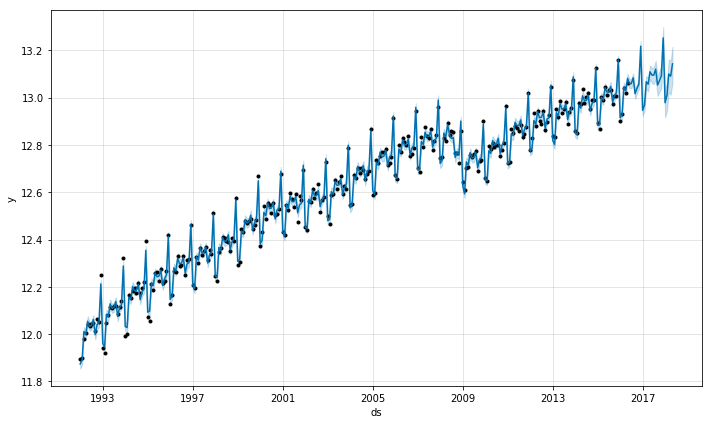

In [70]:
sales_df = pd.read_csv('../data/example_retail_sales.csv', index_col='ds', parse_dates=True)
df = sales_df.reset_index()
df=df.rename(columns={'date':'ds', 'sales':'y'})
df['y'] = np.log(df['y'])
model = Prophet(holidays=promotions)
model.fit(df);
future = model.make_future_dataframe(periods=24, freq = 'm')
forecast = model.predict(future)
model.plot(forecast);

In [68]:

sales_df = pd.read_csv('../data/example_retail_sales.csv', index_col='ds', parse_dates=True)

In [69]:

df = sales_df.reset_index()